# Life and Death

Let's examine the lifespan of strategies.

Recall what we have found re the number of trading systems in the _Data preparation_ chapter.

The following picture shows that the number of trading systems was very low until 2015.

It increased sharply between 2015 and 2017. It stabilised around 06/2017.

A chart of daily systems counts from  2005-02-17  to  2021-04-04 :


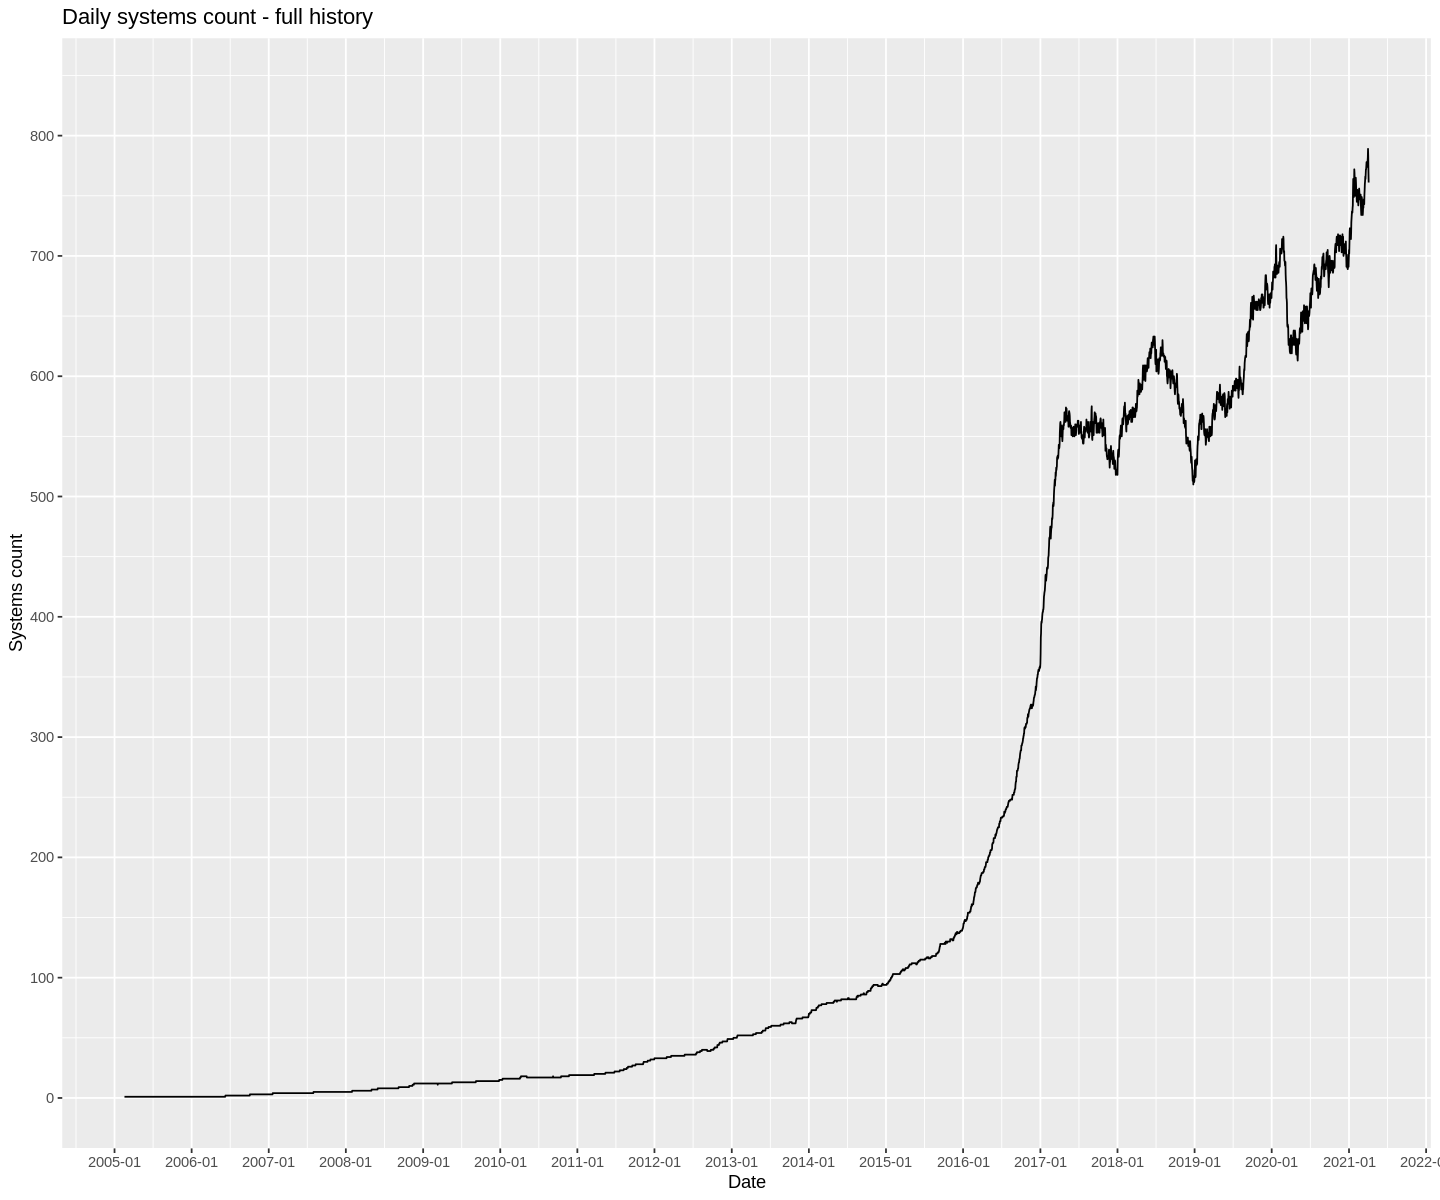

In [1]:
source("JupyterUtils.R")

# Let's omit last 5 days, where some equities are not yet calculated.)
sql = "select * from (
            select  Date(Datetime) as Date, 
            count(distinct(systemid)) as SystemsCount
            from c2ex_equity_daily 
            group by Date(Datetime) 
            order by Date DESC limit 5, 100000) sub  
        order by Date ASC"

datesAndSystems = getC2ScoreDbData(sql)

cat("A chart of daily systems counts from ",datesAndSystems$Date[1]," to ", datesAndSystems$Date[nrow(datesAndSystems)],":\n")

datesAndSystems$Dates = as.Date(datesAndSystems$Date)
ggplot(datesAndSystems, aes(x=Dates, y=SystemsCount)) + 
      ggtitle("Daily systems count - full history") + 
      geom_line() + 
      xlab("Date") + 
      scale_x_date(date_labels = "%Y-%m",date_breaks = "1 year") + 
      scale_y_continuous(name= "Systems count", limits=c(0, max(datesAndSystems$SystemsCount)+50), breaks=seq(0,1000,100))


It does not make too much sense to investigate data in the distant history when the number of systems was low.

Let's get data just from 06/2017 in this part. See the picture below.

A chart of daily systems counts from  2017-06-01  to  2021-04-04 :


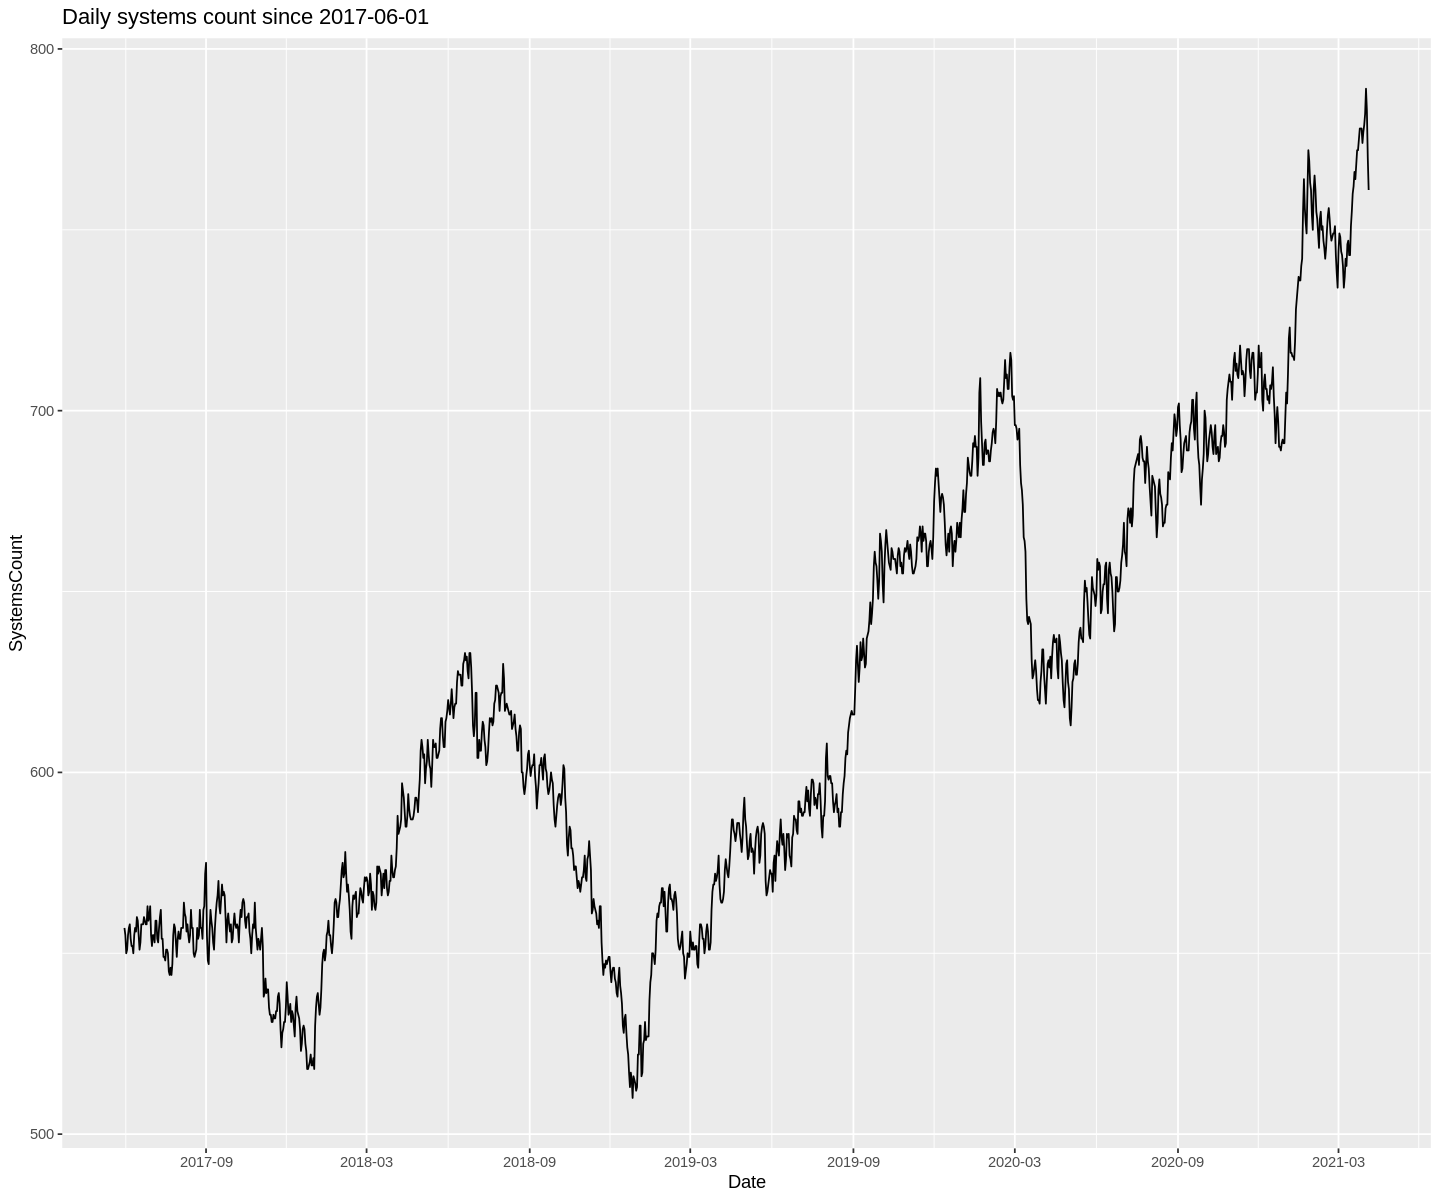

In [3]:
datesAndSystems = datesAndSystems[datesAndSystems$Dates >=  "2017-06-01",]

cat("A chart of daily systems counts from ",datesAndSystems$Date[1]," to ", datesAndSystems$Date[nrow(datesAndSystems)],":\n")

ggplot(datesAndSystems, aes(x=Dates, y=SystemsCount)) + 
      ggtitle("Daily systems count since 2017-06-01") + 
      geom_line() + 
      xlab("Date") + 
      scale_x_date(date_labels = "%Y-%m",date_breaks = "6 months") 

## Let's see what we have in LifeAndDeath data (since 2017-06-01)

In [16]:
ldData = getC2ScoreDbData("call LifeAndDeathProcedure()") # since 2017-06-01

In [17]:
ldData[1,1:10]
ldData[1,c(1:2,11:20)]

,DateStart,SystemsToday,DateEnd007,Died007,DateEnd014,Died014,DateEnd021,Died021,DateEnd030,Died030
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2017-06-01,467,2017-06-08,27,2017-06-15,38,2017-06-22,52,2017-07-01,74


,DateStart,SystemsToday,DateEnd060,Died060,DateEnd090,Died090,DateEnd120,Died120,DateEnd150,Died150,DateEnd180,Died180
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2017-06-01,467,2017-07-31,134,2017-08-30,162,2017-09-29,205,2017-10-29,228,2017-11-28,254


In [18]:
todayNum = ldData[1,]$SystemsToday
cat("We have",todayNum, "trading systems on",ldData[1,]$DateStart,".\n\n")
cat("7 days later, ",ldData[1,]$Died007," of them disappeared. It is ", sprintf("%0.1f%%",100*ldData[1,]$Died007/todayNum),". It doesn't look as a big problem. But...\n\n",sep="")
cat("30 days later,",ldData[1,]$Died030,"disappeared. It is already",sprintf("%0.1f%%",100*ldData[1,]$Died030/todayNum),".\n\n")
cat("3 months later:",ldData[1,]$Died090,"died. It is",sprintf("%0.1f%%",100*ldData[1,]$Died090/todayNum),".\n\n")
cat("6 months later:",ldData[1,]$Died180,"died. It is",sprintf("%0.1f%%",100*ldData[1,]$Died180/todayNum),"!\n\n")
cat("So we have just",sprintf("%0.1f%%",100-(100*ldData[1,]$Died180/todayNum)),"chance that the strategy we have choosen survives 6 months.\n\n")


We have 467 trading systems on 2017-06-01 .

7 days later, 27 of them disappeared. It is 5.8%. It doesn't look as a big problem. But...

30 days later, 74 disappeared. It is already 15.8% .

3 months later: 162 died. It is 34.7% .

6 months later: 254 died. It is 54.4% !

So we have just 45.6% chance that the strategy we have choosen survives 6 months.



Let's visualize percents of dead systems.

In [19]:
percents = lifeAndDeathDataVisualization(ldData)
days = c(7,14,21,30,60,90,120,150,180,210,240,270,300,330,360)
for (i in 1:length(days)) {
   cat(round(mean(percents[,c(sprintf("P%03d",days[i]))],na.rm=TRUE),0),"% of trading systems do not survive",days[i],"days.\n")
}

5 % of trading systems do not survive 7 days.
10 % of trading systems do not survive 14 days.
14 % of trading systems do not survive 21 days.
19 % of trading systems do not survive 30 days.
30 % of trading systems do not survive 60 days.
38 % of trading systems do not survive 90 days.
45 % of trading systems do not survive 120 days.
50 % of trading systems do not survive 150 days.
54 % of trading systems do not survive 180 days.
58 % of trading systems do not survive 210 days.
61 % of trading systems do not survive 240 days.
64 % of trading systems do not survive 270 days.
67 % of trading systems do not survive 300 days.
69 % of trading systems do not survive 330 days.
72 % of trading systems do not survive 360 days.


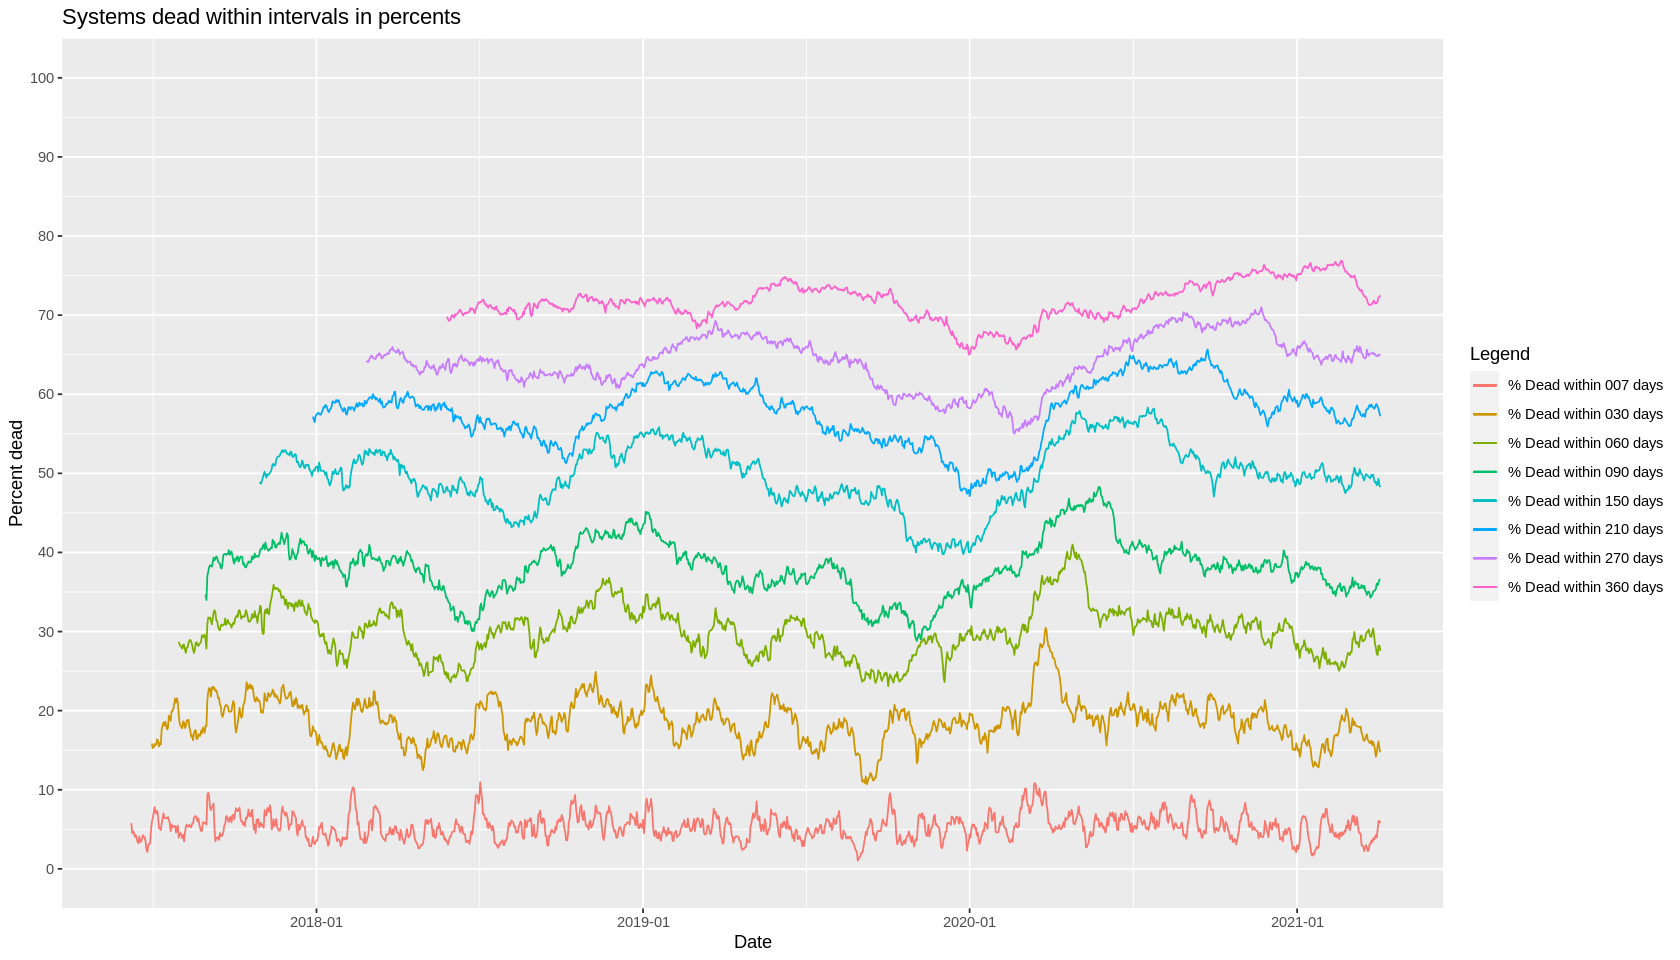

In [20]:
ggplot(percents, aes(x=as.Date(DateStart))) + 
      ggtitle("Systems dead within intervals in percents") + 
      geom_line(aes(y=P007, color='% Dead within 007 days')) + 
#      geom_line(aes(y=P014, color='% Dead within 014 days')) + 
#      geom_line(aes(y=P021, color='% Dead within 021 days')) + 
      geom_line(aes(y=P030, color='% Dead within 030 days')) + 
      geom_line(aes(y=P060, color='% Dead within 060 days')) + 
      geom_line(aes(y=P090, color='% Dead within 090 days')) + 
#      geom_line(aes(y=P120, color='% Dead within 120 days')) + 
      geom_line(aes(y=P150, color='% Dead within 150 days')) + 
#      geom_line(aes(y=P180, color='% Dead within 180 days')) + 
      geom_line(aes(y=P210, color='% Dead within 210 days')) + 
#      geom_line(aes(y=P240, color='% Dead within 240 days')) + 
      geom_line(aes(y=P270, color='% Dead within 270 days')) + 
#      geom_line(aes(y=P300, color='% Dead within 300 days')) + 
#      geom_line(aes(y=P330, color='% Dead within 330 days')) + 
      geom_line(aes(y=P360, color='% Dead within 360 days')) + 
      xlab("Date") + 
      ylab("Percent") + 
      labs(color = "Legend") + 
      scale_x_date(date_labels = "%Y-%m",date_breaks = "1 year") + 
      scale_y_continuous(name= "Percent dead",  limits=c(0, 100), breaks=seq(0,100,10))

## Conclusion

Dead strategies percents are very high. And they are relative stable in time. This is probably the biggest Collective2 problem.

We should be very careful when using some statistics. 

For example: Annual Return.

Recall what we see on the Collective2 strategy page:

> To comply with NFA regulations, we display Cumulative Rate of Return for strategies with a track record of less than one year. 
For strategies with longer track records, we display Annualized (Compounded) Rate of Return.
>
> How Cumulative Rate of Return is calculated = `(Ending_equity - Starting_equity) / Starting_equity`


So our Annual Return is just ROC for strategies younger than 1 year. However, we call it and use it like Annual Return and we can easily forget what it is actually.

Specificaly, we can easily forget what we see above: about 70% of strategies don't live long enough to see a year. 

It means that our Annual Return is from 70% just an extrapolation of short data to the future which will never happen.

If we make a mistake and use _Annualized (Compounded) Rate of Return_ for strategies less than 1 year old, we will find ourselves completely in a fantasy world.

Another example: Sharpe ratio

Sharpe ratio is not time dependant. But it was invented having long live strategies on mind. 

See a remark here: [web.stanford.edu/~wfsharpe/art/sr/SR.htm](http://web.stanford.edu/~wfsharpe/art/sr/SR.htm)

> To maximize information content, it is usually desirable to measure risks and returns using fairly short (e.g. monthly) periods. For purposes of standardization it is then desirable to annualize the results.

Following that, we would annualize 5 or 6 months old strategies in ~50% of cases (see above). So we extrapolate half of the year to the whole year. 

How reliable our results can be then?

(And there is even _Sharpe Ratio Annualised_ there: "The annualized Sharpe ratio is computed by dividing the annualized mean monthly excess return by the annualized monthly standard deviation of excess return.")

We should be very careful when using some statistics for short-term strategies that make up most of the strategies on Collective2.